# SAT Scores data set

### Introduction

The Wakandan Institute of Technology (WIT) wishes to assess the effectiveness of their admission criteria. The main question was: How predictive are SAT score of students' success over their first year. For this, WIT's chief officer of statistics gathered a random sample of 670 newly admitted students.

Each student in the sample took 4 basic STEM courses in the first semester:
- Calculus 1
- Introduction to Computer Science
- Classical Mechanics
- Introduction to Biology

For each student, his/her SAT scores, prior to admission, were recorded. Moreover, at the end of the first semester, the grade of each of the four courses above were marked for every students.

The data appears in the file 'SAT.csv'.

Your job is to analyze the data and prove that there is no connection between SAT scores and grades in first years courses. 
However, if you choose to, you may also try to convince of any possible meaningful and informative connection between the SAT scores and the grades in the courses.


### Notebook

The following imports always make sense.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statistics
import math

In [2]:
%matplotlib inline

You may now read the data file.

In [3]:
data = pd.read_csv("SAT.csv")

Each row of the data represents a single student.

You may use the rest of the notebook for your analysis.

## Visualizing the data

In [4]:
# remove nan columns
data.dropna(axis='columns', inplace=True)

In [5]:
# adding column for "average final score"
data['Average final score'] = data[data.columns[1:]].mean(axis=1)

In [6]:
data.describe()

SAT score  Calculus I final score  \
count   670.000000              670.000000   
mean   1519.265672               73.241791   
std      28.952895                9.800310   
min    1410.000000               41.000000   
25%    1500.000000               67.000000   
50%    1520.000000               74.000000   
75%    1539.000000               80.000000   
max    1600.000000               99.000000   

       Introduction to Computer Science final score  \
count                                    670.000000   
mean                                      78.952239   
std                                        6.283115   
min                                       56.000000   
25%                                       75.000000   
50%                                       79.000000   
75%                                       83.000000   
max                                      100.000000   

       Classical Mechanics final score  Introduction to Biology final score  \
count                       670.000000                           670.000000   
mean                         69.707463                            81.780597   
std                          11.621630                             8.752599   
min                          33.000000                            58.000000   
25%                          62.000000                            76.000000   
50%                          70.000000                            82.000000   
75%                          78.000000                            87.000000   
max                         100.000000                           100.000000   

       Average final score  
count           670.000000  
mean             75.920522  
std               4.596207  
min              63.250000  
25%              72.750000  
50%              76.000000  
75%              79.000000  
max              89.000000

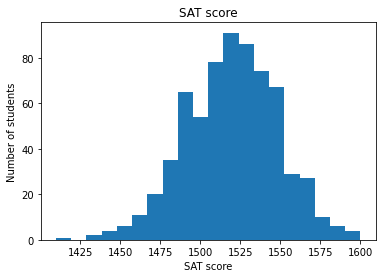

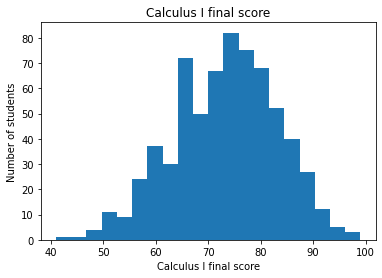

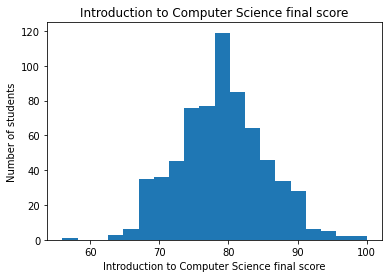

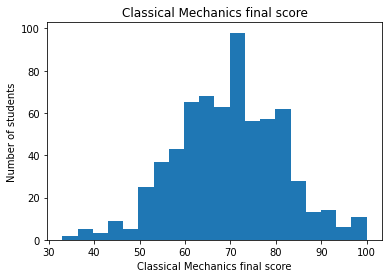

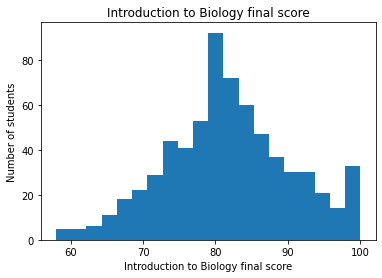

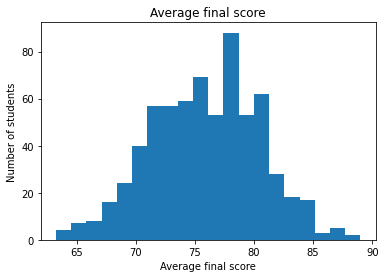

In [7]:
for col in data.columns:
    plt.figure()
    plt.hist(data[col], bins=20)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Number of students")
    plt.show()

## Plotting the scores against each other

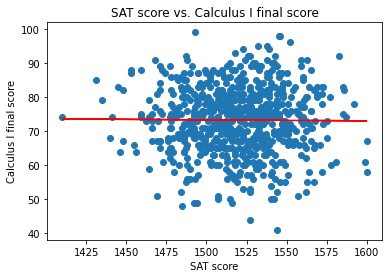

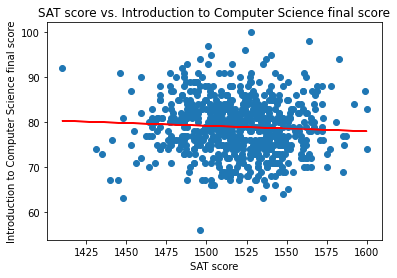

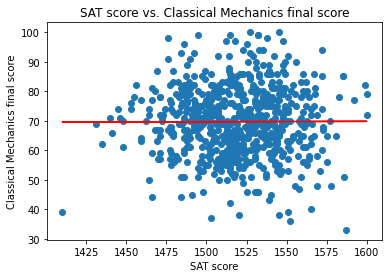

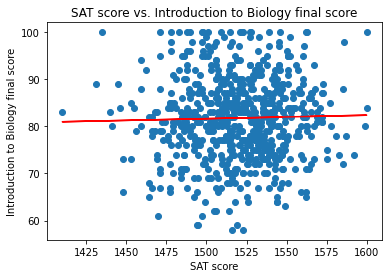

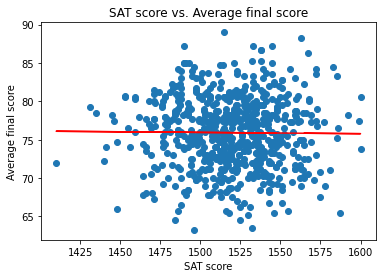

In [8]:
X = np.array(data["SAT score"])
# mean = statistics.mean(X)
# stdev = statistics.stdev(X)
# normal_X = np.array([(val-mean)/stdev for val in X])

for test_score in data.columns[1:]:
    Y = np.array(data[test_score])
#     mean = statistics.mean(Y)
#     stdev = statistics.stdev(Y)
#     normal_Y = np.array([(val-mean)/stdev for val in Y])
    
    m, b = np.polyfit(X, Y, 1)
    
    plt.figure()
    plt.scatter(X, Y)
    plt.plot(X, m*X + b, 'r')
    plt.title(f'SAT score vs. {test_score}')
    plt.xlabel("SAT score")
    plt.ylabel(test_score)
    plt.show()

## Regressions

In [9]:
X = data["SAT score"]
for test_score in data.columns[1:]:
    Y = data[test_score]
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    print("\n\n\n")

                                   OLS Regression Results                                  
Dep. Variable:     Calculus I final score   R-squared (uncentered):                   0.982
Model:                                OLS   Adj. R-squared (uncentered):              0.982
Method:                     Least Squares   F-statistic:                          3.657e+04
Date:                    Sun, 17 Oct 2021   Prob (F-statistic):                        0.00
Time:                            17:09:53   Log-Likelihood:                         -2486.9
No. Observations:                     670   AIC:                                      4976.
Df Residuals:                         669   BIC:                                      4980.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [10]:
X = data['SAT score']
mean = statistics.mean(X)
stdev = statistics.stdev(X)
normal_X = [(val-mean)/stdev for val in X]

for test_score in data.columns[1:]:
    Y = data[test_score]
    mean = statistics.mean(Y)
    stdev = statistics.stdev(Y)
    normal_Y = [(val-mean)/stdev for val in Y]
    model = sm.OLS(normal_Y, normal_X)
    results = model.fit()
    print(results.summary())
    print("\n\n\n")

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                            0.04891
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                       0.825
Time:                        17:09:55   Log-Likelihood:                         -950.16
No. Observations:                 670   AIC:                                      1902.
Df Residuals:                     669   BIC:                                      1907.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Discretizing by letter grade

In [11]:
letter_grade_to_gpa = {'A': 4.0, 'B': 3.0, 'C': 2.0, 'D': 1.0, 'F': 0.0}

def letter_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

def gpa(letter_grades):
    return statistics.mean([letter_grade_to_gpa[g] for g in letter_grades])

In [12]:
# adding columns for letter grades and GPA
data['Calculus I letter grade'] = [letter_grade(s) for s in data['Calculus I final score']]
data['Introduction to Computer Science letter grade'] = [letter_grade(s) for s in data['Introduction to Computer Science final score']]
data['Classical Mechanics letter grade'] = [letter_grade(s) for s in data['Classical Mechanics final score']]
data['Introduction to Biology letter grade'] = [letter_grade(s) for s in data['Introduction to Biology final score']]

data['GPA'] = [gpa(row[data.columns[6:10]]) for index, row in data.iterrows()]

data

SAT score  Calculus I final score  \
0         1547                      78   
1         1521                      70   
2         1471                      76   
3         1532                      70   
4         1554                      82   
..         ...                     ...   
665       1535                      73   
666       1503                      87   
667       1492                      76   
668       1487                      92   
669       1565                      67   

     Introduction to Computer Science final score  \
0                                              75   
1                                              78   
2                                              88   
3                                              71   
4                                              69   
..                                            ...   
665                                            76   
666                                            75   
667                                            71   
668                                            75   
669                                            72   

     Classical Mechanics final score  Introduction to Biology final score  \
0                                 81                                   68   
1                                 74                                   94   
2                                 67                                   95   
3                                 46                                   67   
4                                 65                                   86   
..                               ...                                  ...   
665                               71                                   82   
666                               77                                   85   
667                               77                                   76   
668                               65                                   71   
669                               72                                   86   

     Average final score Calculus I letter grade  \
0                  75.50                       C   
1                  79.00                       C   
2                  81.50                       C   
3                  63.50                       C   
4                  75.50                       B   
..                   ...                     ...   
665                75.50                       C   
666                81.00                       B   
667                75.00                       C   
668                75.75                       A   
669                74.25                       D   

    Introduction to Computer Science letter grade  \
0                                               C   
1                                               C   
2                                               B   
3                                               C   
4                                               D   
..                                            ...   
665                                             C   
666                                             C   
667                                             C   
668                                             C   
669                                             C   

    Classical Mechanics letter grade Introduction to Biology letter grade  \
0                                  B                                    D   
1                                  C                                    A   
2                                  D                                    A   
3                                  F                                    D   
4                                  D                                    B   
..                               ...                                  ...   
665                                C                                    B   
666                                C                        

In [13]:
grades = ['A','B','C','D','F']

In [14]:
# getting sat score distributions within letter grades
sat_raw_data = {c: {grade: [] for grade in grades} for c in data.columns[1:5]}
for col in data.columns[1:5]:
    values = data[col]
    for i, v in enumerate(values):
        sat_raw_data[col][letter_grade(v)].append(data['SAT score'][i])

In [17]:
# getting stats for sat score distributions within letter grades for each class
class_df_map = {}
for c in sat_raw_data:
    class_stats = {}
    for grade in grades:
        sat_scores = sat_raw_data[c][grade]
        stats = pd.DataFrame(sat_scores).describe()[0]
        class_stats[grade] = [stats['count'], stats['mean'], stats['std']**2, stats['50%']]
    class_df = pd.DataFrame()
    class_df['grade'] = grades
    class_df['count'] = [class_stats[grade][0] for grade in grades]
    class_df['mean'] = [class_stats[grade][1] for grade in grades]
    class_df['variance'] = [class_stats[grade][2] for grade in grades]
    class_df['median'] = [class_stats[grade][3] for grade in grades]
    class_df_map[c] = class_df
    print(f'{c}:\n{class_df}\n\n')

Calculus I final score:
  grade  count         mean    variance  median
0     A   25.0  1529.960000  652.373333  1532.0
1     B  158.0  1518.158228  920.936588  1519.0
2     C  248.0  1519.322581  811.887423  1519.5
3     D  184.0  1517.527174  839.573028  1519.0
4     F   55.0  1523.145455  776.719192  1523.0


Introduction to Computer Science final score:
  grade  count         mean     variance  median
0     A   33.0  1510.909091  1286.585227  1511.0
1     B  284.0  1517.954225   780.828286  1518.0
2     C  308.0  1521.418831   847.234433  1523.0
3     D   44.0  1519.454545   785.881607  1520.5
4     F    1.0  1496.000000          NaN  1496.0


Classical Mechanics final score:
  grade  count         mean    variance  median
0     A   31.0  1522.129032  595.382796  1527.0
1     B  103.0  1521.776699  792.704550  1521.0
2     C  211.0  1516.516588  938.565200  1519.0
3     D  196.0  1520.132653  791.007954  1521.5
4     F  129.0  1519.751938  844.250484  1517.0


Introduction to Biolo

Testing the following hypotheses:
$$H_0: \mu_{A, Calculus} = \mu_{B, Calculus}$$
$$H_1: \mu_{A, Calculus} > \mu_{B, Calculus}$$

where $\mu_{A, Calculus}$ and $\mu_{B, Calculus}$ are the average SAT scores for students who received an A and B in Calculus, respectively

We can assume that $\mu_{A, Calculus}$ and $\mu_{B, Calculus}$ are normally distributed since their sample sizes are large enough.

By Welch's t-test, $$t = \frac{\bar{X_A} - \bar{X_B}}{\sqrt{\frac{s^2_A}{N_A} + \frac{s^2_B}{N_B}}}$$

In [16]:
def t(mean_A, var_A, num_A, mean_B, var_B, num_B):
    numerator = mean_A - mean_B
    denominator = math.sqrt(var_A/num_A + var_B/num_B)
    return numerator/denominator

Plugging in $\bar{X_A} = 1529.96$, $s^2_A = 652.373$, $N_A = 25$, $\bar{X_B} = 1518.16$, $s^2_B = 920.937$, $N_B = 158$ gives us:

In [18]:
calc_data = class_df_map['Calculus I final score']
mean_A = calc_data['mean'][0]
var_A = calc_data['variance'][0]
num_A = calc_data['count'][0]
mean_B = calc_data['mean'][1]
var_B = calc_data['variance'][1]
num_B = calc_data['count'][1]

print(mean_A, var_A, num_A, mean_B, var_B, num_B)
print(f't={t(mean_A, var_A, num_A, mean_B, var_B, num_B)}')

1529.96 652.3733333333333 25.0 1518.1582278481012 920.9365879222769 158.0
t=2.088771740665941


$$t = \frac{1529.96 - 1518.16}{\sqrt{\frac{652.373}{25} + \frac{920.937}{158}}} = \frac{11.8}{5.65} = 2.088 > 1.96 = q_{0.05}$$

Therefore, we can reject $H_0$ at level $\alpha = 0.05$

## Looking at students' rank

In [29]:
# adding column for SAT score rank
sorted_sat_scores = sorted(data['SAT score'])[::-1]
data['SAT rank'] = [sorted_sat_scores.index(s) for s in data['SAT score']]
data

SAT score  Calculus I final score  \
0         1547                      78   
1         1521                      70   
2         1471                      76   
3         1532                      70   
4         1554                      82   
..         ...                     ...   
665       1535                      73   
666       1503                      87   
667       1492                      76   
668       1487                      92   
669       1565                      67   

     Introduction to Computer Science final score  \
0                                              75   
1                                              78   
2                                              88   
3                                              71   
4                                              69   
..                                            ...   
665                                            76   
666                                            75   
667                                            71   
668                                            75   
669                                            72   

     Classical Mechanics final score  Introduction to Biology final score  \
0                                 81                                   68   
1                                 74                                   94   
2                                 67                                   95   
3                                 46                                   67   
4                                 65                                   86   
..                               ...                                  ...   
665                               71                                   82   
666                               77                                   85   
667                               77                                   76   
668                               65                                   71   
669                               72                                   86   

     Average final score Calculus I letter grade  \
0                  75.50                       C   
1                  79.00                       C   
2                  81.50                       C   
3                  63.50                       C   
4                  75.50                       B   
..                   ...                     ...   
665                75.50                       C   
666                81.00                       B   
667                75.00                       C   
668                75.75                       A   
669                74.25                       D   

    Introduction to Computer Science letter grade  \
0                                               C   
1                                               C   
2                                               B   
3                                               C   
4                                               D   
..                                            ...   
665                                             C   
666                                             C   
667                                             C   
668                                             C   
669                                             C   

    Classical Mechanics letter grade Introduction to Biology letter grade  \
0                                  B                                    D   
1                                  C                                    A   
2                                  D                                    A   
3                                  F                                    D   
4                                  D                                    B   
..                               ...                                  ...   
665                                C                                    B   
666                                C                        

In [30]:
# adding column for GPA rank
sorted_gpas = sorted(data['GPA'])[::-1]
data['GPA rank'] = [sorted_gpas.index(s) for s in data['GPA']]
data

SAT score  Calculus I final score  \
0         1547                      78   
1         1521                      70   
2         1471                      76   
3         1532                      70   
4         1554                      82   
..         ...                     ...   
665       1535                      73   
666       1503                      87   
667       1492                      76   
668       1487                      92   
669       1565                      67   

     Introduction to Computer Science final score  \
0                                              75   
1                                              78   
2                                              88   
3                                              71   
4                                              69   
..                                            ...   
665                                            76   
666                                            75   
667                                            71   
668                                            75   
669                                            72   

     Classical Mechanics final score  Introduction to Biology final score  \
0                                 81                                   68   
1                                 74                                   94   
2                                 67                                   95   
3                                 46                                   67   
4                                 65                                   86   
..                               ...                                  ...   
665                               71                                   82   
666                               77                                   85   
667                               77                                   76   
668                               65                                   71   
669                               72                                   86   

     Average final score Calculus I letter grade  \
0                  75.50                       C   
1                  79.00                       C   
2                  81.50                       C   
3                  63.50                       C   
4                  75.50                       B   
..                   ...                     ...   
665                75.50                       C   
666                81.00                       B   
667                75.00                       C   
668                75.75                       A   
669                74.25                       D   

    Introduction to Computer Science letter grade  \
0                                               C   
1                                               C   
2                                               B   
3                                               C   
4                                               D   
..                                            ...   
665                                             C   
666                                             C   
667                                             C   
668                                             C   
669                                             C   

    Classical Mechanics letter grade Introduction to Biology letter grade  \
0                                  B                                    D   
1                                  C                                    A   
2                                  D                                    A   
3                                  F                                    D   
4                                  D                                    B   
..                               ...                                  ...   
665                                C                                    B   
666                                C                        

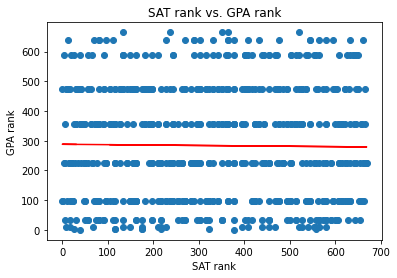

In [33]:
X = np.array(data['SAT rank'])
Y = np.array(data['GPA rank'])

m, b = np.polyfit(X, Y, 1)

plt.figure()
plt.scatter(X, Y)
plt.plot(X, m*X + b, 'r')
plt.title(f'SAT rank vs. GPA rank')
plt.xlabel('SAT rank')
plt.ylabel('GPA rank')
plt.show()

In [36]:
gpas = set(data['GPA'])
gpas

{1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5}

In [47]:
sat_by_gpa = {gpa: [] for gpa in gpas}

for i, s in enumerate(data['SAT score']):
    sat_by_gpa[data['GPA'][i]].append(s)
    
avg_sat_by_gpa = {}
for gpa in gpas:
    avg_sat_by_gpa[gpa] = statistics.mean(sat_by_gpa[gpa])

avg_sat_by_gpa

{1.25: 1516.4,
 2.75: 1517.421875,
 2.0: 1520.1932773109243,
 2.5: 1518.40625,
 1.5: 1515.8846153846155,
 2.25: 1517.2424242424242,
 1.75: 1523.5309734513273,
 3.0: 1518.3636363636363,
 1.0: 1520.8,
 3.25: 1534.625,
 3.5: 1539}

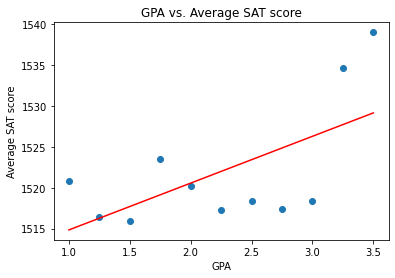

In [50]:
X = np.array(sorted(gpas))
Y = np.array([avg_sat_by_gpa[gpa] for gpa in X])

m, b = np.polyfit(X, Y, 1)

plt.figure()
plt.scatter(X, Y)
plt.plot(X, m*X + b, 'r')
plt.title(f'GPA vs. Average SAT score')
plt.xlabel('GPA')
plt.ylabel('Average SAT score')
plt.show()

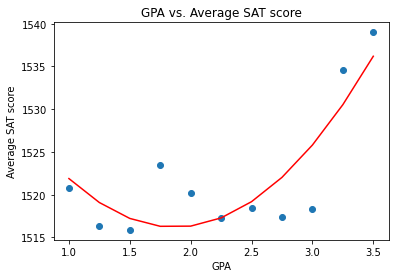

In [52]:
a, b, c = np.polyfit(X, Y, 2)
plt.figure()
plt.scatter(X, Y)
plt.plot(X, a*X**2 + b*X + c, 'r')
plt.title(f'GPA vs. Average SAT score')
plt.xlabel('GPA')
plt.ylabel('Average SAT score')
plt.show()